# 1. Import libraries


In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# 2. Exploratory Data Analysis

**Thông tin của 80 trường dữ liệu:**


- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access

- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad


- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)


- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)


- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade


- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality


- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

**Load data**

In [109]:
# Load data
train_data = pd.read_csv('train.csv', index_col='Id')
test_data = pd.read_csv('test.csv', index_col='Id')
train_data.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [110]:
# Seperate features and target variable
X_train = train_data.drop(['SalePrice'], axis=1)
y = train_data.SalePrice


**Describe data**

In [111]:
print("Kich thuoc tap train: ", X_train.shape)
print("Kich thuoc tap test: ", test_data.shape)

Kich thuoc tap train:  (1460, 79)
Kich thuoc tap test:  (1459, 79)


In [112]:
# Concatenate train and test data
X = pd.concat([X_train, test_data], axis=0)

Cả tập train và test đều có 79 trường dữ liệu độc lập, tập train có 1460 mẫu, tập test có 1459 mẫu.

In [113]:
numericalCols = list(train_data.select_dtypes(exclude='object').columns)
print(f"Co {len(numericalCols)} dac trung numerical:\n", numericalCols)

Co 37 dac trung numerical:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [114]:
categoricalCols = list(train_data.select_dtypes(include='object').columns)
print(f"Co {len(categoricalCols)} dac trung categorical:\n", categoricalCols)

Co 43 dac trung categorical:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [115]:
df_sub = pd.read_csv('sample_submission.csv')
df_sub.head(2)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989


In [116]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [117]:
list_missing_value = train_data.columns[train_data.isnull().any()].to_list()
print(f"Co {len(list_missing_value)} cot bi thieu du lieu trong tap train")
print(list_missing_value)

Co 19 cot bi thieu du lieu trong tap train
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [118]:
test_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [119]:
list_missing_value = test_data.columns[test_data.isnull().any()].to_list()
print(f"Co {len(list_missing_value)} cot bi thieu du lieu trong tap test")
print(list_missing_value)

Co 33 cot bi thieu du lieu trong tap test
['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


Có những cột trong tập train không có dữ liệu khuyết nhưng trong tập test có dữ liệu khuyết.

## Biến numeric

**Độ tương quan giữa các biến (tất nhiên là chỉ có tác dụng với các numeric feature rồi)**

Chỉ vẽ ra tương quan với các feature có abs(corr) > 0.5

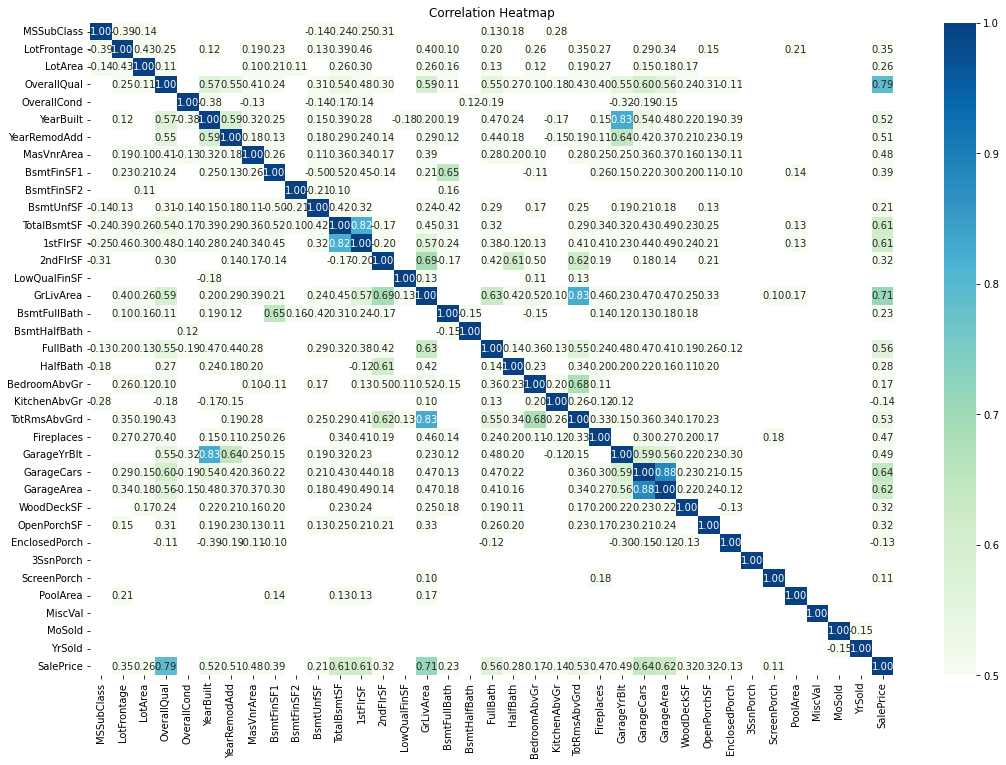

In [120]:
# Create correlation matrix from train data
corr_mat = train_data.corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.1]

# Plot correlation heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.2f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

Trong 36 numeric feature này, chỉ có một lượng có giá trị tuyệt đối của tương quan > 0.5 với SalePrice. Tuy nhiên, nhìn hình trên, có một vài cặp independent variable tương quan mạnh với nhau: 
- `TotalBsmtSF` - `1stFlrSF`: Diện tích của basement area ~ Diện tích của tầng 1.
- `YearBuilt` - `GarageYrBlt`: Ngày nhà xây dựng ~ số năm mà cái Garage đã được sử dụng từ ngày xây dựng
- `GrLivArea` - `TotRmsAbvGrd`: Tổng diện tích ngôi nhà từ mặt đất trở lên ~ Tổng số phòng trong nhà ngoại trừ phòng tắm từ tầng mặt đất trở lên.
- `GarageCars` - `GarageArea`: Số lượng chiếc xe có thể để trong garage ~ kích thước garage 

Những biến này, ta sẽ bỏ đi 1 trong 2 vì biết được 1 biến ta có thể suy ra giá trị của biến còn lại, và tất nhiên ta sẽ giữ lại những biến nào có tương quan mạnh hơn với dependent variable. Đây gọi là vấn đề **multicolinearity**

Xóa 1 trong 2 biến: `TotalBsmtSF` - `1stFlrSF`

In [121]:
train_data[['TotalBsmtSF', '1stFlrSF','SalePrice']].corr()

,TotalBsmtSF,1stFlrSF,SalePrice
TotalBsmtSF,1.000000,0.819530,0.613581
1stFlrSF,0.819530,1.000000,0.605852
SalePrice,0.613581,0.605852,1.000000


In [122]:
X[['TotalBsmtSF', '1stFlrSF']].isnull().sum()

TotalBsmtSF    1
1stFlrSF       0
dtype: int64

In [123]:
X = X.drop('1stFlrSF', axis = 1)

Xóa 1 trong 2 biến: `YearBuilt` - `GarageYrBlt`

In [124]:
train_data[['YearBuilt', 'GarageYrBlt', 'SalePrice']].corr()

,YearBuilt,GarageYrBlt,SalePrice
YearBuilt,1.000000,0.825667,0.522897
GarageYrBlt,0.825667,1.000000,0.486362
SalePrice,0.522897,0.486362,1.000000


In [125]:
X = X.drop('GarageYrBlt', axis = 1)

Xóa 1 trong 2 biến: `GrLivArea` - `TotRmsAbvGrd`

In [126]:
train_data[['GrLivArea', 'TotRmsAbvGrd', 'SalePrice']].corr()

,GrLivArea,TotRmsAbvGrd,SalePrice
GrLivArea,1.000000,0.825489,0.708624
TotRmsAbvGrd,0.825489,1.000000,0.533723
SalePrice,0.708624,0.533723,1.000000


In [127]:
X = X.drop('TotRmsAbvGrd', axis = 1)

Xóa 1 trong 2 biến: `GarageCars` - `GarageArea`

In [128]:
train_data[['GarageCars', 'GarageArea', 'SalePrice']].corr()

,GarageCars,GarageArea,SalePrice
GarageCars,1.000000,0.882475,0.640409
GarageArea,0.882475,1.000000,0.623431
SalePrice,0.640409,0.623431,1.000000


In [129]:
X = X.drop('GarageArea', axis = 1)

In [130]:
train_data = train_data.drop(['1stFlrSF', 'GarageYrBlt', 'TotRmsAbvGrd', 'GarageArea'], axis = 1)

**Phân tích phân phối của các numeric feature.**

**SalePrice**

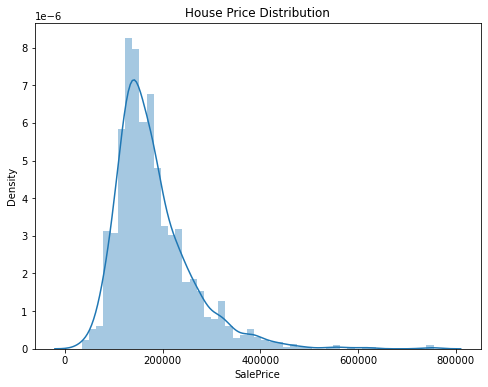

In [131]:
plt.figure(figsize=(8,6))
sns.distplot(y)
title = plt.title("House Price Distribution")

Phân phối SalePrice bị right-skewed. Tính thử 2 số liệu thống kê Skewness và Kurtosis.

In [132]:
print(f"""Skewness: {y.skew()}
Kurtosis: {y.kurt()}""")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


**OverallQual - Chất lượng toàn bộ nội thất trong nhà**

Overall Quality là biến có tương quan nhất với SalePrice, và rõ ràng là OverallQual càng cao thì SalePrice càng cao.

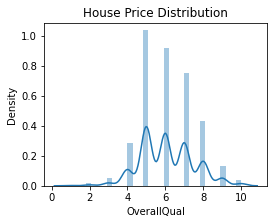

In [133]:
plt.figure(figsize=(4,3))
sns.distplot(X['OverallQual'])
title = plt.title("House Price Distribution")

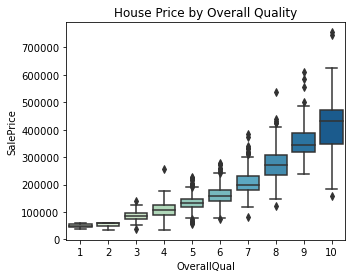

In [134]:
plt.figure(figsize=(5, 4))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data, palette='GnBu')
title = plt.title('House Price by Overall Quality')

**Living Area (GrLivArea) - Tổng diện tích ngôi nhà từ mặt đất trở lên**
- GrLivArea sẽ không bao gồm diện tích garage, basement (tầng hầm)

Correlation:  0.7086244776126515


<Figure size 360x360 with 0 Axes>

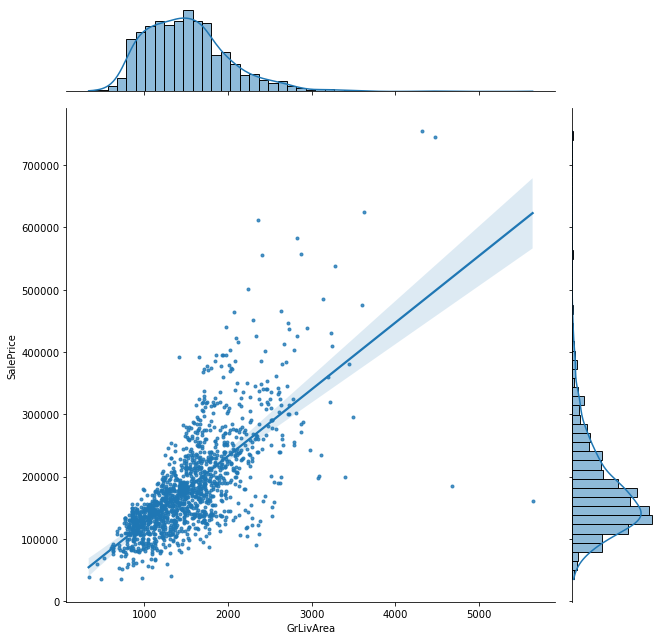

In [135]:
def plotCorrelation(variables):
    """
    1. Print correlation of two variables
    2. Create jointplot of two variables
    """
    # Print correlation
    print("Correlation: ", train_data[[variables[0],
                                       variables[1]]].corr().iloc[1, 0])

    # Create jointplot
    plt.figure(figsize=(5, 5))
    sns.jointplot(train_data[variables[0]],
                  train_data[variables[1]],
                  kind='reg',
                  height=9,

                  # sets the size of the scatter plot markers to 10 points.
                  scatter_kws={'s': 9}, 

                  #the marginal histograms should be displayed as kernel density estimates (KDE) instead of histograms.
                  marginal_kws={'kde': True})
    


plotCorrelation(['GrLivArea', 'SalePrice'])

**Year Built (YearBuilt) - số năm được sử dụng**

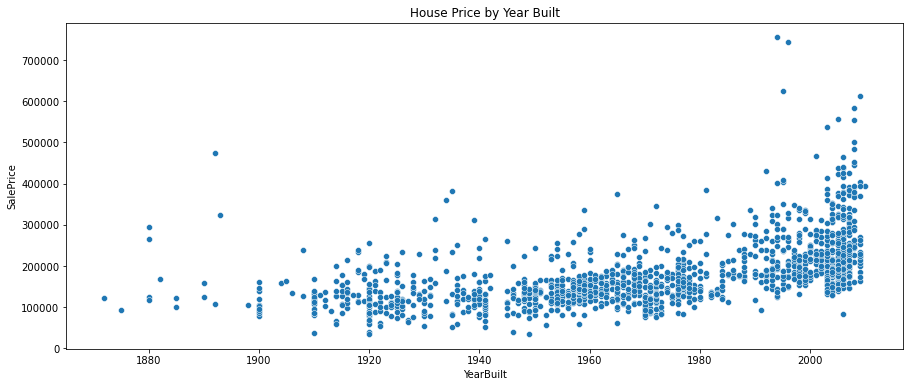

In [136]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train_data)
title = plt.title('House Price by Year Built')

**Year Build** cũng đóng vai trò quan trọng trong việc dự đoán giá. Nhà càng mới thì sẽ có giá trung bình càng cao. Tuy nhiên có một vài ngôi nhà trước năm 1900 có giá cao.

**YearRemodAdd - Ngày sửa sang lại**

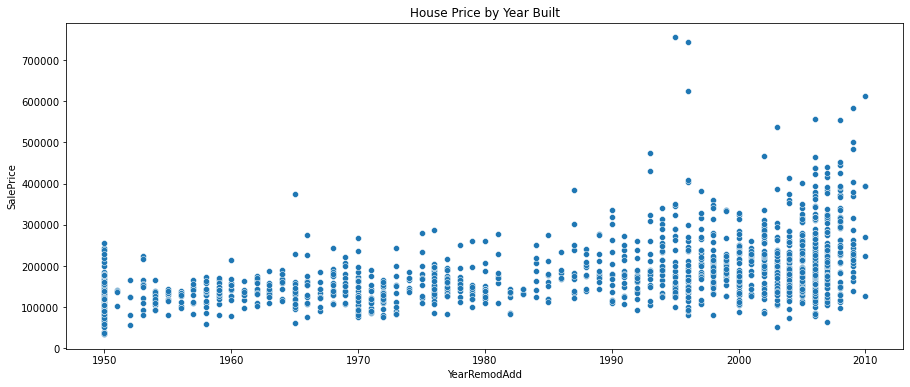

In [137]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=train_data)
title = plt.title('House Price by Year Built')

**TotalBsmtSF - Tổng diện tích tầng hầm**

Correlation:  0.6135805515591943


<Figure size 432x432 with 0 Axes>

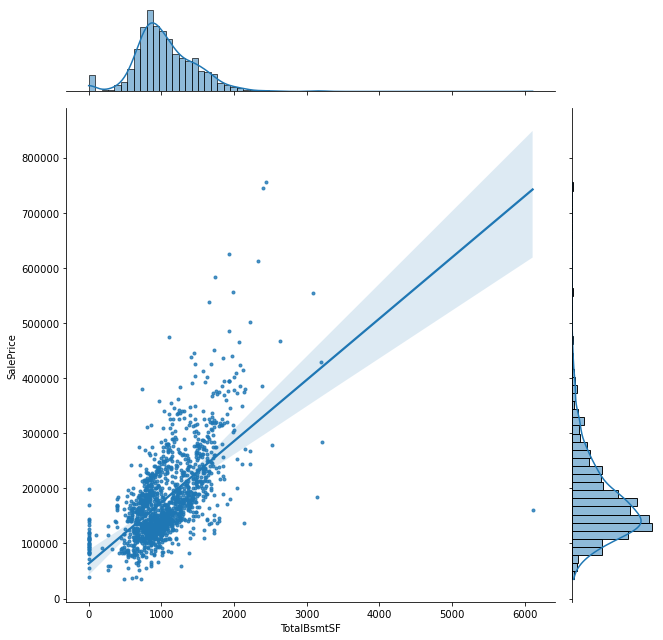

In [138]:
def plotCorrelation(variables):
    """
    1. Print correlation of two variables
    2. Create jointplot of two variables
    """
    # Print correlation
    print("Correlation: ", train_data[[variables[0],
                                       variables[1]]].corr().iloc[1, 0])

    # Create jointplot
    plt.figure(figsize=(6, 6))
    sns.jointplot(train_data[variables[0]],
                  train_data[variables[1]],
                  kind='reg',
                  height=9,

                  # sets the size of the scatter plot markers to 10 points.
                  scatter_kws={'s': 9}, 

                  #the marginal histograms should be displayed as kernel density estimates (KDE) instead of histograms.
                  marginal_kws={'kde': True})
    


plotCorrelation(['TotalBsmtSF', 'SalePrice'])

**FullBath**

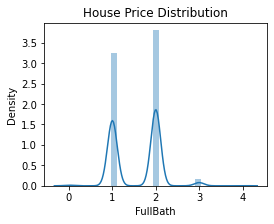

In [139]:
plt.figure(figsize=(4,3))
sns.distplot(X['FullBath'])
title = plt.title("House Price Distribution")

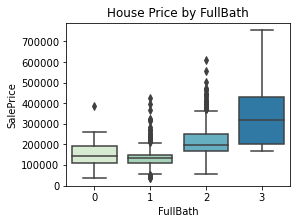

In [140]:
plt.figure(figsize=(4, 3))
sns.boxplot(x='FullBath', y='SalePrice', data=train_data, palette='GnBu')
title = plt.title('House Price by FullBath')

## Biến Categorical

Using **ANOVA**, I have identified 15 categorical features having p-values lower than ***0.01***:

In [141]:
categorical_features = [
    'Street', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
    'Condition1', 'Condition2', 'RoofMatl', 'ExterQual', 'BsmtQual',
    'BsmtExposure', 'KitchenQual', 'Functional', 'GarageQual', 'PoolQC'
]

In [142]:
def visualizeCatFeature(feature):
    """
    Visualize the relationship between `SalePrice` and categorical feature using box plots
    """
    # Descending order of levels sorted by median SalePrice
    featOrder = train_data.groupby(
        [feature]).median().SalePrice.sort_values(ascending=False).index

    # Create box plot
    sns.boxplot(x=feature,
                y='SalePrice',
                data=train_data,
                order=featOrder,
                palette='GnBu_r')

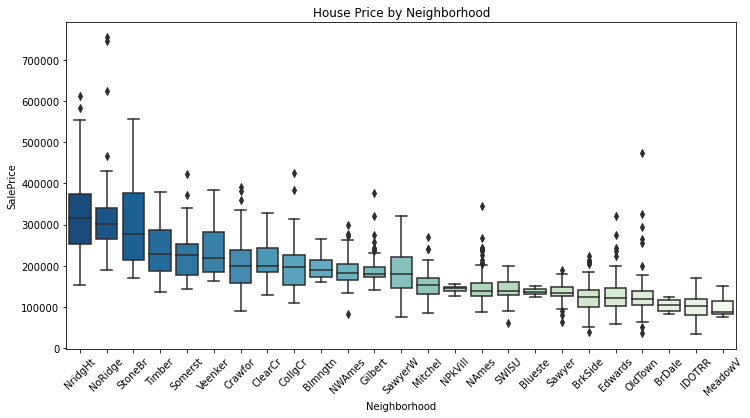

In [143]:
plt.figure(figsize=(12, 6))
visualizeCatFeature('Neighborhood')
title = plt.title('House Price by Neighborhood')
tick = plt.xticks(rotation=45)

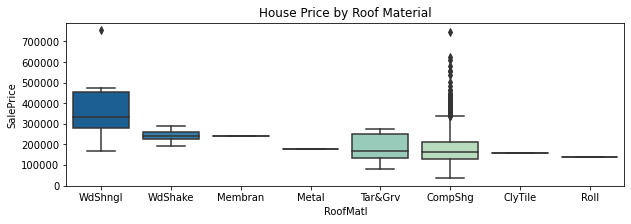

In [144]:
plt.figure(figsize=(10, 3))
visualizeCatFeature('RoofMatl')
title = plt.title('House Price by Roof Material')

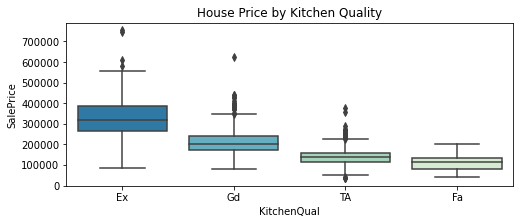

In [145]:
plt.figure(figsize=(8, 3))
visualizeCatFeature('KitchenQual')
title = plt.title('House Price by Kitchen Quality')

**Missing Values**

In [146]:
missing_data_count = X.isnull().sum()
missing_data_percent = X.isnull().sum() / len(X) * 100
missing_data = pd.DataFrame({
    'Count': missing_data_count,
    'Percent': missing_data_percent
})
missing_data = missing_data[missing_data.Count > 0]
missing_data.sort_values(by='Count', ascending=False, inplace=True)

In [147]:
missing_data.head(10)

,Count,Percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageType,157,5.378554


In [148]:
print(f"Co {len(missing_data)} feature bi thieu")

Co 32 feature bi thieu


In [149]:
missing_data.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtFullBath', 'BsmtHalfBath', 'Utilities', 'Functional', 'GarageCars', 'TotalBsmtSF', 'KitchenQual', 'Electrical', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'Exterior2nd', 'Exterior1st', 'SaleType'], dtype='object')

Đối với `PoolQC`, `MiscFeature`, `Alley`, `Fence`, `FireplaceQu`,`GarageCond`, `GarageFinish` , `GarageQual`, `GarageType`, `BsmtCond`,  `BsmtExposure`, `BsmtQual`, `BsmtFinType2`, `BsmtFinType1`, `MasVnrType` là 15 biến categorical với giá trị NA nghĩa là không có.

In [150]:
group_1 = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','GarageCond', 'GarageFinish' , 'GarageQual', 'GarageType', 'BsmtCond',  'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType']
X[group_1] = X[group_1].fillna("None")
train_data[group_1] = train_data[group_1].fillna("None")

Đối với `GarageCars`, `TotalBsmtSF`, `BsmtUnfSF`, `BsmtFinSF2`, `BsmtFinSF1`, `MasVnrArea`,  `BsmtFullBath`, `BsmtHalfBath` là 8 biến numeric với giá trị NA nghĩa là không có.

In [151]:
group_2 = ['GarageCars', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath']

X[group_2] = X[group_2].fillna(0)
train_data[group_2] = train_data[group_2].fillna(0)


`MSZoning` -
`Utilities` -
`Functional` - chất lượng của hệ thống sưởi và làm mát, hệ thống ống nước, hệ thống điện,...

`KitchenQual` - chất lượng bếp
`Electrical` - 
`Exterior2nd` -
`Exterior1st` - 
`SaleType` - 

Cả 8 biến này, giá trị NA không có nghĩa là không có, nên ta chọn điền giá trị mode.

In [152]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

group_3 = ['MSZoning', 'Utilities', 'Functional', 'KitchenQual', 'Electrical', 'Exterior1st',
    'Exterior2nd', 'SaleType']
X[group_3] = pd.DataFrame(imputer.fit_transform(X[group_3]), index=X.index)
train_data[group_3] = pd.DataFrame(imputer.fit_transform(train_data[group_3]), index=train_data.index)


In [153]:
X.LotFrontage = X.LotFrontage.fillna(X.LotFrontage.mean())
train_data.LotFrontage = train_data.LotFrontage.fillna(train_data.LotFrontage.mean())

In [154]:
print(sum(X.isnull().sum()))
print(sum(train_data.isnull().sum()))


0
0


**Outliers**

Mô hình hồi quy rất nhạy cảm với nhiễu, nên chúng ta cần xử lý một cách cẩn thận.

Với dữ liệu categorical thường khó phát hiện ra outlier hơn, tham khảo https://machinelearningcoban.com/tabml_book/ch_data_processing/process_outliers.html

`GrLivArea`

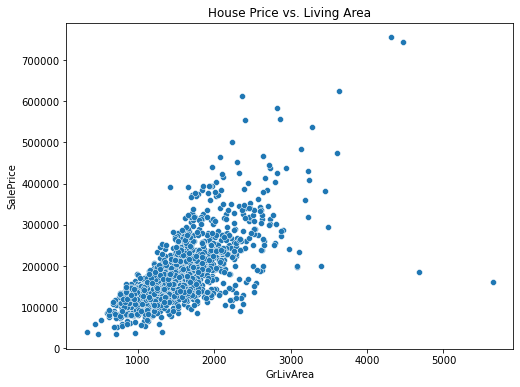

In [155]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
title = plt.title('House Price vs. Living Area')

In [156]:
train_data[(train_data['GrLivArea'] >4000) & (train_data['SalePrice'] < 200000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,None,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,1538,0,4676,1,0,3,1,3,1,Ex,Typ,1,Gd,BuiltIn,Fin,3,TA,TA,Y,208,406,0,0,0,0,None,None,None,0,10,2007,New,Partial,184750
1299,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,950,0,5642,2,0,2,1,3,1,Ex,Typ,3,Gd,Attchd,Fin,2,TA,TA,Y,214,292,0,0,0,480,Gd,None,None,0,1,2008,New,Partial,160000


In [157]:
train_data[(train_data['GrLivArea'] >3500) & (train_data['SalePrice'] > 200000)]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
186,75,RM,90.0,22950,Pave,None,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,1107,GasA,Ex,Y,SBrkr,1518,572,3608,0,0,2,1,4,1,Ex,Typ,2,TA,Detchd,Unf,3,Ex,TA,Y,0,260,0,0,410,0,None,GdPrv,None,0,6,2006,WD,Normal,475000
692,60,RL,104.0,21535,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,1872,0,4316,0,1,3,1,4,1,Ex,Typ,2,Ex,Attchd,Fin,3,TA,TA,Y,382,50,0,0,0,0,None,None,None,0,1,2007,WD,Normal,755000
1170,60,RL,118.0,35760,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1796,0,3627,1,0,3,1,4,1,Gd,Typ,1,TA,Attchd,Fin,3,TA,TA,Y,361,76,0,0,0,0,None,None,None,0,7,2006,WD,Normal,625000
1183,60,RL,160.0,15623,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2065,0,4476,1,0,3,1,4,1,Ex,Typ,2,TA,Attchd,Fin,3,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,None,0,7,2007,WD,Abnorml,745000


Có thể dễ dàng thấy được 2 điểm outlier ở bên trên.

In [158]:
outlier_index = train_data[(train_data.GrLivArea > 4000)
                           & (train_data.SalePrice < 200000)].index
X.drop(outlier_index, axis=0, inplace=True)
y.drop(outlier_index, axis=0, inplace=True)

train_data.drop(outlier_index, axis=0, inplace=True)

`TotalBsmtSF`

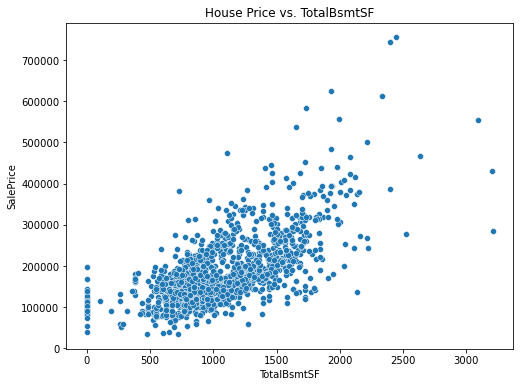

In [159]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train_data)
title = plt.title('House Price vs. TotalBsmtSF')

In [160]:
train_data[(train_data['TotalBsmtSF'] >3000) & (train_data['SalePrice'] < 400000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
333,20,RL,85.0,10655,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,None,479,1603,3206,GasA,Ex,Y,SBrkr,0,0,1629,1,0,2,0,3,1,Gd,Typ,1,Gd,Attchd,RFn,3,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,10,2009,WD,Normal,284000


In [161]:
train_data[(train_data['TotalBsmtSF'] >3000) & (train_data['SalePrice'] > 500000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
441,20,RL,105.0,15431,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,0,0,2402,1,0,2,0,2,1,Ex,Typ,2,Gd,Attchd,Fin,3,TA,TA,Y,0,72,0,0,170,0,None,None,None,0,4,2009,WD,Normal,555000


`TotalBsmtSF` - diện tích tầng hầm = 0, không có nghĩa là outlier. Có những điểm mà TotalBSmtSF lớn mà giá thấp, như phân tích liền kề ở trên, thì vẫn hợp lý, có thể là do OverallQual ở mức 10,...

`Street`

In [162]:
X['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

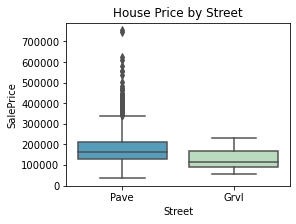

In [163]:
plt.figure(figsize=(4, 3))
visualizeCatFeature('Street')
title = plt.title('House Price by Street')

In [164]:
def histogram_for_categorical_feature(feature):
  plt.figure(figsize=(4,3))
  counts = X[feature].value_counts()
  sns_plot = sns.countplot(X[feature])

  # Viết số lên cột, canh giữa mỗi cột
  for i, v in enumerate(counts.values):
      x_offset = sns_plot.patches[i].get_width() / 2
      y_offset = 0.1
      plt.text(sns_plot.patches[i].get_x() + x_offset, v + y_offset, str(v), ha='center')
  plt.title(f"{feature} Distribution")
  plt.show()

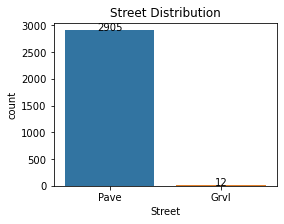

In [165]:
histogram_for_categorical_feature('Street')

Số lượng quá áp đảo. Liệu có thể gộp 2 cột này, và loại bỏ feature này đi được không?

`LandContour`

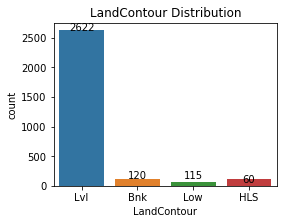

In [166]:
histogram_for_categorical_feature('LandContour')

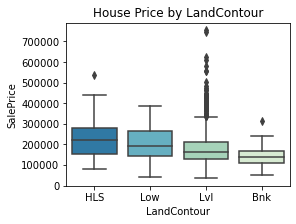

In [167]:
plt.figure(figsize=(4, 3))
visualizeCatFeature('LandContour')
title = plt.title('House Price by LandContour')

In [168]:
train_data[(train_data['LandContour'] == 'HLS') & (train_data['SalePrice'] > 500000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
770,60,RL,47.0,53504,Pave,None,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416,Unf,0,234,1650,GasA,Ex,Y,SBrkr,1589,0,3279,1,0,3,1,4,1,Ex,Mod,1,Gd,BuiltIn,Fin,3,TA,TA,Y,503,36,0,0,210,0,None,None,None,0,6,2010,WD,Normal,538000


In [169]:
train_data[(train_data['LandContour'] == 'HLS') & (train_data['SalePrice'] < 100000)]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
98,20,RL,73.0,10921,Pave,None,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,BrkFace,48.0,TA,TA,CBlock,TA,TA,No,Rec,520,Unf,0,440,960,GasA,TA,Y,FuseF,0,0,960,1,0,1,0,3,1,TA,Typ,0,None,Attchd,Fin,1,TA,TA,P,120,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,94750
1324,30,RL,50.0,5330,Pave,None,Reg,HLS,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,4,7,1940,1950,Hip,CompShg,VinylSd,VinylSd,None,0.0,Fa,TA,CBlock,TA,TA,No,LwQ,280,Unf,0,140,420,GasA,Gd,Y,SBrkr,0,0,708,0,0,1,0,2,1,Fa,Typ,0,None,None,None,0,None,None,Y,164,0,0,0,0,0,None,None,None,0,12,2009,WD,Normal,82500


Những điểm được cho là outlier trên đồ thị `House Price By LandContour` trên không phải là outlier, mà giá cao bị chi phối bởi nhiều feature khác. Như phân tích liền kề bên trên, ví dụ ta chỉ xét giá của ngôi nhà có LandContour = HLS trên 500.000 có thể là do OverallQual ở mức 8, còn <100000 thì OverallQual ở mức 4.

### Feature Engineering

#### Create new variables

In [170]:
# X['totalSqFeet'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
# X['totalBathroom'] = X.FullBath + X.BsmtFullBath + 0.5 * (X.HalfBath + X.BsmtHalfBath)
# X['houseAge'] = X.YrSold - X.YearBuilt
# X['reModeled'] = np.where(X.YearRemodAdd == X.YearBuilt, 0, 1)
# X['isNew'] = np.where(X.YrSold == X.YearBuilt, 1, 0)

#### Label Encoding

Dùng cho các biến ordinal categorical, nhắm chuẩn hóa về số.


In [171]:
from sklearn.preprocessing import LabelEncoder


# Apply Label Encoder
label_encoder = LabelEncoder()
label_encoding_cols = [
    "Alley", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
    "BsmtQual", "ExterCond", "ExterQual", "FireplaceQu", "Functional",
    "GarageCond", "GarageQual", "HeatingQC", "KitchenQual", "LandSlope",
    "LotShape", "PavedDrive", "PoolQC", "Street", "Utilities"
]

for col in label_encoding_cols:
  X[col] = label_encoder.fit_transform(X[col])

#### Biến đổi numerical variable sang categorical variable

`YrSold` có thể tác động lớn tới giá (ví dụ năm đó khủng hoảng kinh tế, chiến tranh,...giá nhà có thể thấp). Do đó, ta chuyển chúng sang dạng categorical.

`MoSold`, `MSSubClass` là những biến numeric nhưng không có ý nghĩa gì về mặt thứ tự nên ta chuyển nó sang dạng categorical.

In [172]:
to_factor_cols = ['YrSold', 'MoSold', 'MSSubClass']

for col in to_factor_cols:
    X[col] = X[col].apply(str)

#### Skewness and normalizing variables

**Target variable**

In [173]:
from scipy import stats
from scipy.stats import norm

In [174]:
def normality_plot(X):
    """
    1. Draw distribution plot with normal distribution fitted curve
    2. Draw Quantile-Quantile plot 
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.distplot(X, fit=norm, ax=axes[0])
    axes[0].set_title('Distribution Plot')

    axes[1] = stats.probplot((X), plot=plt)
    plt.tight_layout()

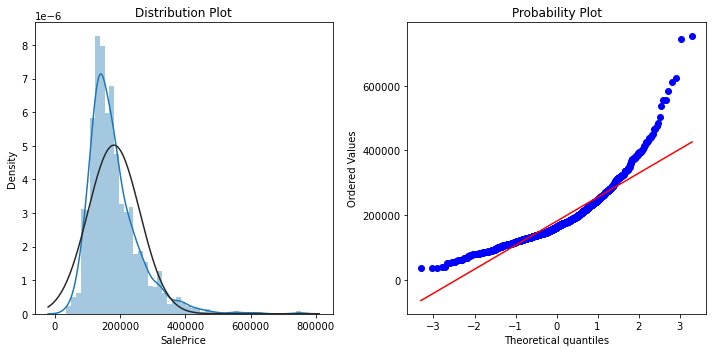

In [175]:
normality_plot(y)


Một trong những cách để normalize right-skewd data là dùng log transformation vì giá trị lớn sẽ bị kéo về giữa, tuy nhiên log(0) = nan, nên tôi dùng log(1+x).

In [176]:
y = np.log(1 + y)

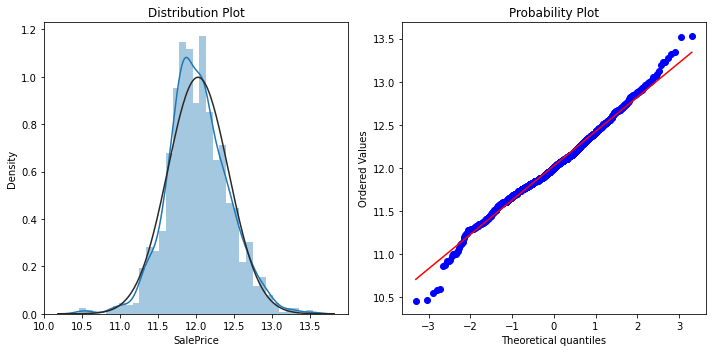

In [177]:
normality_plot(y)

Bước tiếp theo, kiểm tra skewness của các numerical variable còn lại và dùng log transformation để chuẩn hóa.
- Nếu skewness <= -1 or >= 1, thì phân phối bị highly skewed.
- Nếu skewness nằm giữa -1 và -0.5 hoặc 0.5 và 1 thì phân phối bị moderately skewed.
- Nếu skewness nằm giữa -0.5 và 0.5 thì phân phối approximately symmetric.

In [178]:
skewness = train_data.skew().sort_values(ascending=False)
skewness[abs(skewness) > 0.5]

MiscVal          24.460085
PoolArea         15.948945
LotArea          12.573925
3SsnPorch        10.297106
LowQualFinSF      9.004955
KitchenAbvGr      4.484883
BsmtFinSF2        4.251925
ScreenPorch       4.118929
BsmtHalfBath      4.100114
EnclosedPorch     3.087164
MasVnrArea        2.696329
OpenPorchSF       2.339829
SalePrice         1.881296
LotFrontage       1.694720
WoodDeckSF        1.545805
MSSubClass        1.407011
GrLivArea         1.010992
BsmtUnfSF         0.920903
2ndFlrSF          0.812957
BsmtFinSF1        0.764789
OverallCond       0.691035
HalfBath          0.680051
Fireplaces        0.632060
BsmtFullBath      0.590358
TotalBsmtSF       0.511703
YearRemodAdd     -0.501838
YearBuilt        -0.612295
dtype: float64

In [179]:
# List of skewed columns
skewed_cols = list(skewness[abs(skewness) > 0.5].index)

# Remove 'MSSubClass' and 'SalePrice'
skewed_cols = [
    col for col in skewed_cols if col not in ['MSSubClass', 'SalePrice']
]

# Log-transform skewed columns
for col in skewed_cols:
    X[col] = np.log(1 + X[col])

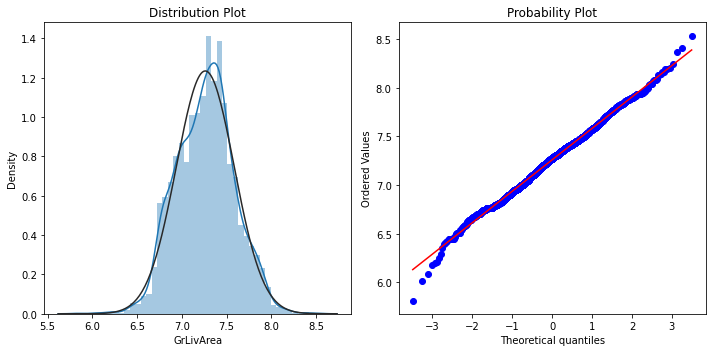

In [180]:
normality_plot(X.GrLivArea)

#### Feature Scaling

Ngoại trừ Decision Tree và Random Forest, các thuật toán còn lại trong machine learning nên được standardize để mô hình nhanh hội tụ và ổn định.

In [181]:
from sklearn.preprocessing import RobustScaler
numerical_cols = list(X.select_dtypes(exclude=['object']).columns)
scaler = RobustScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [182]:
X.shape

(2917, 75)

#### One-hot encoding

In [183]:
X = pd.get_dummies(X, drop_first=True)
print("X.shape:", X.shape)

X.shape: (2917, 228)


Sau khi tiền xử lý, ta chia data lại như ban đầu, tập train và test.

In [184]:
ntest = len(test_data)
ntest

1459

In [185]:
X_train = X.iloc[:-ntest, :]
X_test = X.iloc[-ntest:, :]
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

X_train.shape: (1458, 228)
X_test.shape: (1459, 228)


# Modeling

Trong model evaluation, thường thì ta sẽ chia toàn bộ data làm 2 tập train và test. Tuy nhiên data khá nhỏ, nên nếu chia như vậy, thì có lẽ mô hình sẽ dễ bị overfitting, do đó, ta dùng `cross-validation` để train mô hình.


Đề bài yêu cầu đánh giá mô hình bằng độ đo RMSE, tuy nhiên do target variable đã được biến đổi qua log(1 + y), nên MSE cho log(1 + y) là MSLE - Mean Squared Logarithmic Error.

In [186]:
from sklearn.model_selection import KFold, cross_val_score

n_folds = 5


def getRMSLE(model):
    """
    Return the average RMSLE over all folds of training data.
    """
    # Set KFold to shuffle data before the split
    kf = KFold(n_folds, shuffle=True, random_state=42)

    # Get RMSLE score
    rmse = np.sqrt(-cross_val_score(
        model, X_train, y, scoring="neg_mean_squared_error", cv=kf))

    return rmse.mean()

## Regularized Regressions

In [187]:
from sklearn.linear_model import Ridge, Lasso

Best lambda: 20.0
RMSLE: 0.11586294141644393


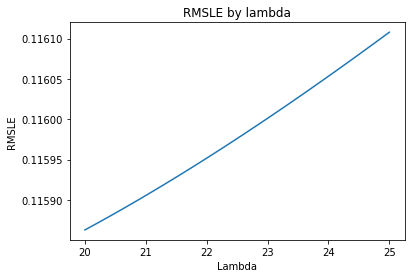

In [188]:
lambda_list = list(np.linspace(20, 25, 101))

rmsle_ridge = [getRMSLE(Ridge(alpha=lambda_)) for lambda_ in lambda_list]
rmsle_ridge = pd.Series(rmsle_ridge, index=lambda_list)

rmsle_ridge.plot(title="RMSLE by lambda")
plt.xlabel("Lambda")
plt.ylabel("RMSLE")

print("Best lambda:", rmsle_ridge.idxmin())
print("RMSLE:", rmsle_ridge.min())

In [189]:
ridge = Ridge(alpha=20)

Best lambda: 0.0006
RMSLE: 0.11537635346474721


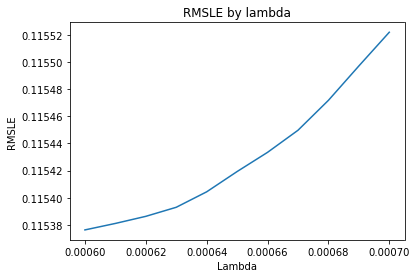

In [190]:
lambda_list = list(np.linspace(0.0006, 0.0007, 11))
rmsle_lasso = [
    getRMSLE(Lasso(alpha=lambda_, max_iter=100000)) for lambda_ in lambda_list
]
rmsle_lasso = pd.Series(rmsle_lasso, index=lambda_list)

rmsle_lasso.plot(title="RMSLE by lambda")
plt.xlabel("Lambda")
plt.ylabel("RMSLE")

print("Best lambda:", rmsle_lasso.idxmin())
print("RMSLE:", rmsle_lasso.min())

In [191]:
# lasso = Lasso(alpha=0.0006, max_iter=100000)

In [192]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from xgboost import XGBRegressor

In [193]:
lasso = Lasso(random_state=42)
lasso_search_space = {
    'alpha': Real(0.01, 1.0),
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'max_iter': Integer(100, 10000),
    'tol': Real(1e-6, 1e-2)
}

In [194]:
lasso_bayes_cv = BayesSearchCV(lasso, lasso_search_space, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
lasso_bayes_cv.fit(X_train, y)

BayesSearchCV(cv=5, estimator=Lasso(random_state=42), random_state=42,
              scoring='neg_mean_squared_error',
              search_spaces={'alpha': Real(low=0.01, high=1.0, prior='uniform', transform='normalize'),
                             'fit_intercept': [True, False],
                             'max_iter': Integer(low=100, high=10000, prior='uniform', transform='normalize'),
                             'normalize': [True, False],
                             'tol': Real(low=1e-06, high=0.01, prior='uniform', transform='normalize')})

In [195]:
ridge = Ridge(random_state=42)
ridge_search_space = {
    'alpha': Real(0.01, 1.0),
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'max_iter': Integer(100, 10000),
    'tol': Real(1e-6, 1e-2)
}


In [196]:
ridge_bayes_cv = BayesSearchCV(ridge, ridge_search_space, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
ridge_bayes_cv.fit(X_train, y)

BayesSearchCV(cv=5, estimator=Ridge(random_state=42), random_state=42,
              scoring='neg_mean_squared_error',
              search_spaces={'alpha': Real(low=0.01, high=1.0, prior='uniform', transform='normalize'),
                             'fit_intercept': [True, False],
                             'max_iter': Integer(low=100, high=10000, prior='uniform', transform='normalize'),
                             'normalize': [True, False],
                             'tol': Real(low=1e-06, high=0.01, prior='uniform', transform='normalize')})

In [197]:
from xgboost import XGBRegressor

# define the search space for the hyperparameters
xgb_search_space = {'learning_rate': Real(0.01, 1.0),
                'max_depth': Integer(1, 10),
                'min_child_weight': Integer(1, 10),
                'subsample': Real(0.1, 1.0),
                'n_estimators': Integer(50, 500)}

xgb = XGBRegressor(random_state=42)
xgb_bayes_cv = BayesSearchCV(xgb, xgb_search_space, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
xgb_bayes_cv.fit(X_train, y)

BayesSearchCV(cv=5,
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
              search_spaces={'learning_rate': Real(low=0.01, high=1.0, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=1, high=10, prior='uniform', transform='normalize'),
                           

In [198]:
# print("Best hyperparameters:", xgb_bayes_cv.best_params_)
# xgb_bayes_cv.predict(X_test)
# y_pred = xgb_bayes_cv.predict(X_test)
# # mse = mean_squared_error(y, y_pred)
# # print("Testing MSE:", mse)
# final_predictions = np.exp(y_pred) - 1
# output = pd.DataFrame({'Id': test_data.index, 'SalePrice': final_predictions})
# output.to_csv('submission.csv', index=False)


Best hyperparameters: OrderedDict([('learning_rate', 0.4661996464024548), ('max_depth', 1), ('min_child_weight', 10), ('n_estimators', 500), ('subsample', 1.0)])

In [199]:

# xgb = XGBRegressor(learning_rate=0.05,
#                    n_estimators=2100,
#                    max_depth=2,
#                    min_child_weight=2,
#                    gamma=0,
#                    subsample=0.65,
#                    colsample_bytree=0.46,
#                    nthread=-1,
#                    scale_pos_weight=1,
#                    reg_alpha=0.464,
#                    reg_lambda=0.8571,
#                    silent=1,
#                    random_state=7,
#                    n_jobs=2)
# getRMSLE(xgb)

In [201]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(random_state=42)
lgb_search_space = {
    'learning_rate': Real(0.01, 1.0),
    'max_depth': Integer(1, 10),
    'n_estimators': Integer(50, 500),
    'num_leaves': Integer(2, 50),
    'subsample': Real(0.1, 1.0),
    'colsample_bytree': Real(0.1, 1.0),
    'reg_alpha': Real(0.0, 1.0),
    'reg_lambda': Real(0.0, 1.0),
    'min_child_samples': Integer(1, 50)
}
lgb_bayes_cv = BayesSearchCV(lgb, lgb_search_space, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
lgb_bayes_cv.fit(X_train, y)

BayesSearchCV(cv=5, estimator=LGBMRegressor(random_state=42), random_state=42,
              scoring='neg_mean_squared_error',
              search_spaces={'colsample_bytree': Real(low=0.1, high=1.0, prior='uniform', transform='normalize'),
                             'learning_rate': Real(low=0.01, high=1.0, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=1, high=10, prior='uniform', transform='normali...
                             'n_estimators': Integer(low=50, high=500, prior='uniform', transform='normalize'),
                             'num_leaves': Integer(low=2, high=50, prior='uniform', transform='normalize'),
                             'reg_alpha': Real(low=0.0, high=1.0, prior='uniform', transform='normalize'),
                             'reg_lambda': Real(low=0.0, high=1.0, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.1, high=1.0, prior='uniform', transform='normalize')})

In [ ]:
# print("Best hyperparameters:", lgb_bayes_cv.best_params_)
# lgb_bayes_cv.predict(X_test)
# y_pred = lgb_bayes_cv.predict(X_test)
# # mse = mean_squared_error(y, y_pred)
# # print("Testing MSE:", mse)
# final_predictions = np.exp(y_pred) - 1
# output = pd.DataFrame({'Id': test_data.index, 'SalePrice': final_predictions})
# output.to_csv('submission.csv', index=False)

In [ ]:
# lgb = LGBMRegressor(objective='regression',
#                     learning_rate=0.05,
#                     n_estimators=730,
#                     num_leaves=8,
#                     min_data_in_leaf=4,
#                     max_depth=3,
#                     max_bin=55,
#                     bagging_fraction=0.78,
#                     bagging_freq=5,
#                     feature_fraction=0.24,
#                     feature_fraction_seed=9,
#                     bagging_seed=9,
#                     min_sum_hessian_in_leaf=11)
# getRMSLE(lgb)

[LightGBM] [Warning] feature_fraction is set=0.24, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.24
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.24, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.24
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[Ligh

0.11502568418214869

In [202]:
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone


class AveragingModel(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        # Create clone models
        self.models_ = [clone(x) for x in self.models]

        # Train cloned models
        for model in self.models_:
            model.fit(X, y)

        return self

    def predict(self, X):
        # Get predictions from trained clone models
        predictions = np.column_stack(
            [model.predict(X) for model in self.models_])

        # Return average predictions
        return np.mean(predictions, axis=1)

In [203]:
# avg_model = AveragingModel(models=(ridge, lasso, xgb, lgb))
# getRMSLE(avg_model)

In [ ]:
# avg_model = AveragingModel(models=(ridge, lasso, xgb, lgb))

In [208]:
avg_model = AveragingModel(models=(ridge_bayes_cv, lasso_bayes_cv, xgb_bayes_cv, lgb_bayes_cv))

AveragingModel(models=(BayesSearchCV(cv=5, estimator=Ridge(random_state=42),
                                     random_state=42,
                                     scoring='neg_mean_squared_error',
                                     search_spaces={'alpha': Real(low=0.01, high=1.0, prior='uniform', transform='normalize'),
                                                    'fit_intercept': [True,
                                                                      False],
                                                    'max_iter': Integer(low=100, high=10000, prior='uniform', transform='normalize'),
                                                    'normalize': [True, False],
                                                    'tol': Real...
                                                    'n_estimators': Integer(low=50, high=500, prior='uniform', transform='normalize'),
                                                    'num_leaves': Integer(low=2, high=50, prior='unif

In [207]:
my_model = avg_model
# my_model.fit(X_train, y)
predictions = my_model.predict(X_test)
final_predictions = np.exp(predictions) - 1
output = pd.DataFrame({'Id': test_data.index, 'SalePrice': final_predictions})
output.to_csv('submission.csv', index=False)

AttributeError: 'BayesSearchCV' object has no attribute 'best_estimator_'

In [206]:
print("Best hyperparameters for lasso:", lasso_bayes_cv.best_params_)
print("Best hyperparameters for ridge:", ridge_bayes_cv.best_params_)
print("Best hyperparameters for xgb:", xgb_bayes_cv.best_params_)
print("Best hyperparameters for lgb:", lgb_bayes_cv.best_params_)


Best hyperparameters for lasso: OrderedDict([('alpha', 0.01), ('fit_intercept', True), ('max_iter', 100), ('normalize', False), ('tol', 1e-06)])
Best hyperparameters for ridge: OrderedDict([('alpha', 1.0), ('fit_intercept', True), ('max_iter', 10000), ('normalize', False), ('tol', 1e-06)])
Best hyperparameters for xgb: OrderedDict([('learning_rate', 0.4661996464024548), ('max_depth', 1), ('min_child_weight', 10), ('n_estimators', 500), ('subsample', 1.0)])
Best hyperparameters for lgb: OrderedDict([('colsample_bytree', 0.9573578393243821), ('learning_rate', 0.254153578835166), ('max_depth', 2), ('min_child_samples', 1), ('n_estimators', 500), ('num_leaves', 16), ('reg_alpha', 0.7633405164835857), ('reg_lambda', 0.8098124484316083), ('subsample', 0.1)])


In [209]:
predictions = lgb_bayes_cv.predict(X_test)
final_predictions = np.exp(predictions) - 1
output = pd.DataFrame({'Id': test_data.index, 'SalePrice': final_predictions})
output.to_csv('submission1.csv', index=False)

In [210]:
predictions = lasso_bayes_cv.predict(X_test)
final_predictions = np.exp(predictions) - 1
output = pd.DataFrame({'Id': test_data.index, 'SalePrice': final_predictions})
output.to_csv('submission2.csv', index=False)

In [211]:
predictions = ridge_bayes_cv.predict(X_test)
final_predictions = np.exp(predictions) - 1
output = pd.DataFrame({'Id': test_data.index, 'SalePrice': final_predictions})
output.to_csv('submission3.csv', index=False)